<h1 align="center">NYC Taxi Fare And Duration Prediction- Modeling</h1>

<font color='blueviolet'><h2>Taxi Cleaned And Merged Data Importing</h2></font>

In [2]:
#ucitavanje potrebnih biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets

In [3]:
#ucitavanje podataka iz 2016.godine za mjesec maj
data=pd.read_parquet('yellow_tripdata_2016-05_and_weather.parquet',engine='fastparquet')

In [4]:
data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_date,pickup_time,...,week_day,day_type,day_time_slot,duration,avg_speed,temperature,humidity,pressure,wind_speed,weather_description
index,,,,,,,,,,,,,,,,,,,,,
0,1,1,1.4481,1,166,238,2,5.5,2016-05-01,00:01:47,...,6,2.0,6,3.666667,23.696182,14.12,50.0,1023.0,5.0,broken clouds
1,1,1,3.2180,1,151,74,2,11.0,2016-05-01,00:11:46,...,6,2.0,6,13.816667,13.974427,14.12,50.0,1023.0,5.0,broken clouds
2,1,1,4.5052,1,41,263,1,12.5,2016-05-01,00:17:15,...,6,2.0,6,15.100000,17.901457,14.12,50.0,1023.0,5.0,broken clouds
3,1,2,2.7353,1,239,263,1,7.0,2016-05-01,00:05:19,...,6,2.0,6,5.350000,30.676262,14.12,50.0,1023.0,5.0,broken clouds
4,1,1,8.5277,1,263,79,2,15.5,2016-05-01,00:16:32,...,6,2.0,6,14.516667,35.246521,14.12,50.0,1023.0,5.0,broken clouds


In [5]:
data.dtypes

VendorID                 int64
passenger_count          int64
trip_distance          float64
RatecodeID               int64
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount            float64
pickup_date             object
pickup_time             object
dropoff_date            object
dropoff_time            object
week_day                 int64
day_type               float64
day_time_slot            int64
duration               float64
avg_speed              float64
temperature            float64
humidity               float64
pressure               float64
wind_speed             float64
weather_description     object
dtype: object

In [6]:
#izbacivanje obiljezja koja su tipa 'object'
data.drop(columns=['VendorID','pickup_date','pickup_time','dropoff_date','dropoff_time'],axis=1,inplace=True)

In [7]:
data.dtypes

passenger_count          int64
trip_distance          float64
RatecodeID               int64
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount            float64
week_day                 int64
day_type               float64
day_time_slot            int64
duration               float64
avg_speed              float64
temperature            float64
humidity               float64
pressure               float64
wind_speed             float64
weather_description     object
dtype: object

<h3>Enkodovanje obiljezja za opis vremena</h3>

In [8]:
data['weather_description'].unique().tolist()

['broken clouds',
 'scattered clouds',
 'sky is clear',
 'mist',
 'drizzle',
 'light intensity drizzle',
 'fog',
 'haze',
 'light rain',
 'overcast clouds',
 'moderate rain',
 'few clouds',
 'thunderstorm with light rain',
 'thunderstorm',
 'proximity thunderstorm']

In [9]:
#dodjeljivanje brojeva svakoj kategoriji opisa od ljepseg ka losijem vremenu
data['weather_description'] = data['weather_description'].replace('sky is clear',1)
data['weather_description'] = data['weather_description'].replace('few clouds',2)
data['weather_description'] = data['weather_description'].replace('scattered clouds',3)
data['weather_description'] = data['weather_description'].replace('broken clouds',4)
data['weather_description'] = data['weather_description'].replace('overcast clouds',5)
data['weather_description'] = data['weather_description'].replace('haze',6)
data['weather_description'] = data['weather_description'].replace('fog',7)
data['weather_description'] = data['weather_description'].replace('mist',8)
data['weather_description'] = data['weather_description'].replace('light intensity drizzle',9)
data['weather_description'] = data['weather_description'].replace('drizzle',10)
data['weather_description'] = data['weather_description'].replace('light rain',11)
data['weather_description'] = data['weather_description'].replace('moderate rain',12)
data['weather_description'] = data['weather_description'].replace('proximity thunderstorm',13)
data['weather_description'] = data['weather_description'].replace('thunderstorm with light rain',14)
data['weather_description'] = data['weather_description'].replace('thunderstorm',15)

data.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,week_day,day_type,day_time_slot,duration,avg_speed,temperature,humidity,pressure,wind_speed,weather_description
index,,,,,,,,,,,,,,,,,
0,1,1.4481,1,166,238,2,5.5,6,2.0,6,3.666667,23.696182,14.12,50.0,1023.0,5.0,4
1,1,3.2180,1,151,74,2,11.0,6,2.0,6,13.816667,13.974427,14.12,50.0,1023.0,5.0,4
2,1,4.5052,1,41,263,1,12.5,6,2.0,6,15.100000,17.901457,14.12,50.0,1023.0,5.0,4
3,2,2.7353,1,239,263,1,7.0,6,2.0,6,5.350000,30.676262,14.12,50.0,1023.0,5.0,4
4,1,8.5277,1,263,79,2,15.5,6,2.0,6,14.516667,35.246521,14.12,50.0,1023.0,5.0,4


In [10]:
data['weather_description'].unique()

array([ 4,  3,  1,  8, 10,  9,  7,  6, 11,  5, 12,  2, 14, 15, 13],
      dtype=int64)

<font color='royalblue'><h3>Podjela podataka na trening i test skup za predvidjanje cijene</h3></font>

In [11]:
#tUlazne varijable za trening za cijenu voznje
X1=data.drop('fare_amount',axis=1)
X1

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,week_day,day_type,day_time_slot,duration,avg_speed,temperature,humidity,pressure,wind_speed,weather_description
index,,,,,,,,,,,,,,,,
0,1,1.44810,1,166,238,2,6,2.0,6,3.666667,23.696182,14.12,50.0,1023.0,5.0,4
1,1,3.21800,1,151,74,2,6,2.0,6,13.816667,13.974427,14.12,50.0,1023.0,5.0,4
2,1,4.50520,1,41,263,1,6,2.0,6,15.100000,17.901457,14.12,50.0,1023.0,5.0,4
3,2,2.73530,1,239,263,1,6,2.0,6,5.350000,30.676262,14.12,50.0,1023.0,5.0,4
4,1,8.52770,1,263,79,2,6,2.0,6,14.516667,35.246521,14.12,50.0,1023.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11583025,1,0.93322,1,231,211,1,1,1.0,6,3.100000,18.062323,27.97,54.0,1013.0,5.0,2
11583026,1,1.78599,1,48,164,1,1,1.0,6,5.466667,19.602329,27.97,54.0,1013.0,5.0,2
11583027,1,2.33305,1,164,48,2,1,1.0,6,7.450000,18.789664,27.97,54.0,1013.0,5.0,2


In [12]:
#Izlazna labela za cijenu
y1=data['fare_amount']
y1

index
0            5.5
1           11.0
2           12.5
3            7.0
4           15.5
            ... 
11583025     4.5
11583026     6.0
11583027     7.0
11583028     9.0
11583029    16.0
Name: fare_amount, Length: 11583030, dtype: float64

In [13]:
#Podjela na trening i test skup
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X1, y1 ,test_size=0.2, random_state =42)
#Izdvajanje validacionog skupa
X_train1 , X_val1 , y_train1 , y_val1 = train_test_split( X_train1 ,y_train1 ,test_size=0.1, random_state =42)

In [14]:
print('X_train1:', X_train1.shape)
print('X_val1:',X_val1.shape)
print('X_test1:',X_test1.shape)

X_train1: (8339781, 16)
X_val1: (926643, 16)
X_test1: (2316606, 16)


<font color='royalblue'><h3>Podjela podataka na trening i test skup za predvidjanje trajanja</h3></font>

In [15]:
#Ulazne varijable za trajanje voznje
X2=data.drop('duration',axis=1)
X2

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,week_day,day_type,day_time_slot,avg_speed,temperature,humidity,pressure,wind_speed,weather_description
index,,,,,,,,,,,,,,,,
0,1,1.44810,1,166,238,2,5.5,6,2.0,6,23.696182,14.12,50.0,1023.0,5.0,4
1,1,3.21800,1,151,74,2,11.0,6,2.0,6,13.974427,14.12,50.0,1023.0,5.0,4
2,1,4.50520,1,41,263,1,12.5,6,2.0,6,17.901457,14.12,50.0,1023.0,5.0,4
3,2,2.73530,1,239,263,1,7.0,6,2.0,6,30.676262,14.12,50.0,1023.0,5.0,4
4,1,8.52770,1,263,79,2,15.5,6,2.0,6,35.246521,14.12,50.0,1023.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11583025,1,0.93322,1,231,211,1,4.5,1,1.0,6,18.062323,27.97,54.0,1013.0,5.0,2
11583026,1,1.78599,1,48,164,1,6.0,1,1.0,6,19.602329,27.97,54.0,1013.0,5.0,2
11583027,1,2.33305,1,164,48,2,7.0,1,1.0,6,18.789664,27.97,54.0,1013.0,5.0,2


In [16]:
y2=data['duration']
y2

index
0            3.666667
1           13.816667
2           15.100000
3            5.350000
4           14.516667
              ...    
11583025     3.100000
11583026     5.466667
11583027     7.450000
11583028    10.933333
11583029    15.000000
Name: duration, Length: 11583030, dtype: float64

In [17]:
#Podjela na trening i test skup
X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(X2, y2 ,test_size=0.2, random_state =42)
#Izdvajanje validacionog skupa
X_train2 , X_val2 , y_train2, y_val2 = train_test_split( X_train2 ,y_train2 ,test_size=0.1, random_state =42)

<font color='royalblue'><h3>Standardizacija obiljezja</h3></font>

Skaliranje podataka-standardizacija koje normalizuje oblježja tako da imaju strednju vrijednost 0 i standardnu devijaciju 1,što dovodi do ubrzanja obuke.
#### Ovo se vrsi da bi se neka obiljezja ne bi izdvajala po svojim vrijendostima od drugih i tako uticala na donosenje pogresnih odluka modela

In [18]:
#standardizacija za predikciju fare_amount
scaler = StandardScaler()
scaler.fit(X_train1)

X_train_std1 = scaler.transform(X_train1)
X_val_std1=scaler.transform(X_val1)
X_test_std1 = scaler.transform(X_test1)

X_train_std1 = pd.DataFrame(X_train_std1)
X_val_std1=pd.DataFrame(X_val_std1)
X_test_std1 = pd.DataFrame(X_test_std1)

X_train_std1.columns = list(X1.columns)
X_val_std1.columns=list(X1.columns)
X_test_std1.columns = list(X1.columns)

X_train_std1.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,week_day,day_type,day_time_slot,duration,avg_speed,temperature,humidity,pressure,wind_speed,weather_description
0,-0.508488,-0.436150,-0.144054,-0.012186,-1.577523,1.345614,1.470771,1.274270,-1.007048,-0.293848,-0.649877,-1.077433,-0.683254,-0.970456,1.697078,-1.110502
1,0.257266,-0.324407,-0.144054,-0.012186,-0.984399,-0.705135,-1.471796,-0.654649,1.335210,-0.443722,0.020454,-0.129062,0.177939,-0.442422,-0.173436,-0.120859
2,1.023019,-0.537250,-0.144054,1.001195,0.145362,-0.705135,-0.490940,-0.654649,1.335210,-0.749072,-0.110553,1.083371,-1.861729,0.789657,0.761821,-0.780621
3,0.257266,-0.478718,-0.144054,1.016098,0.046508,1.345614,0.980343,1.274270,0.164081,0.068930,-1.100564,0.861172,-1.000536,-1.498490,1.697078,-0.780621
4,-0.508488,-0.664955,-0.144054,-1.696186,0.060630,-0.705135,-0.981368,-0.654649,-1.592612,-0.816305,-0.752866,-0.719983,1.447066,-0.266411,-1.108693,0.868784


In [19]:
#standardizacija za predikciju duration
scaler = StandardScaler()
scaler.fit(X_train2)

X_train_std2= scaler.transform(X_train2)
X_val_std2=scaler.transform(X_val2)
X_test_std2 = scaler.transform(X_test2)

X_train_std2 = pd.DataFrame(X_train_std2)
X_val_std2=pd.DataFrame(X_val_std2)
X_test_std2 = pd.DataFrame(X_test_std2)

X_train_std2.columns = list(X2.columns)
X_val_std2.columns=list(X2.columns)
X_test_std2.columns = list(X2.columns)

X_train_std2.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,week_day,day_type,day_time_slot,avg_speed,temperature,humidity,pressure,wind_speed,weather_description
0,-0.508488,-0.436150,-0.144054,-0.012186,-1.577523,1.345614,-0.437010,1.470771,1.274270,-1.007048,-0.649877,-1.077433,-0.683254,-0.970456,1.697078,-1.110502
1,0.257266,-0.324407,-0.144054,-0.012186,-0.984399,-0.705135,-0.437010,-1.471796,-0.654649,1.335210,0.020454,-0.129062,0.177939,-0.442422,-0.173436,-0.120859
2,1.023019,-0.537250,-0.144054,1.001195,0.145362,-0.705135,-0.664253,-0.490940,-0.654649,1.335210,-0.110553,1.083371,-1.861729,0.789657,0.761821,-0.780621
3,0.257266,-0.478718,-0.144054,1.016098,0.046508,1.345614,-0.209767,0.980343,1.274270,0.164081,-1.100564,0.861172,-1.000536,-1.498490,1.697078,-0.780621
4,-0.508488,-0.664955,-0.144054,-1.696186,0.060630,-0.705135,-0.709702,-0.981368,-0.654649,-1.592612,-0.752866,-0.719983,1.447066,-0.266411,-1.108693,0.868784


<h4><font color="green">FUNCKIJA - za odredjivanje evaluacije modela </font></h4>
<hr>

In [12]:
def model_evaluation(y_test, y_predicted):
    mse = mean_squared_error(y_test, y_predicted) 
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)

    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y_test.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

<hr>

<font color='blueviolet'><h2>Linear Regression</h2></font>

<font color='royalblue'><h3>Fare Amount</h3></font>

<h3>Hipoteza y=b0+b1x1+b2x2+...+bnxn </h3> 

In [21]:
X_train_std1

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,week_day,day_type,day_time_slot,duration,avg_speed,temperature,humidity,pressure,wind_speed,weather_description
0,-0.508488,-0.436150,-0.144054,-0.012186,-1.577523,1.345614,1.470771,1.274270,-1.007048,-0.293848,-0.649877,-1.077433,-0.683254,-0.970456,1.697078,-1.110502
1,0.257266,-0.324407,-0.144054,-0.012186,-0.984399,-0.705135,-1.471796,-0.654649,1.335210,-0.443722,0.020454,-0.129062,0.177939,-0.442422,-0.173436,-0.120859
2,1.023019,-0.537250,-0.144054,1.001195,0.145362,-0.705135,-0.490940,-0.654649,1.335210,-0.749072,-0.110553,1.083371,-1.861729,0.789657,0.761821,-0.780621
3,0.257266,-0.478718,-0.144054,1.016098,0.046508,1.345614,0.980343,1.274270,0.164081,0.068930,-1.100564,0.861172,-1.000536,-1.498490,1.697078,-0.780621
4,-0.508488,-0.664955,-0.144054,-1.696186,0.060630,-0.705135,-0.981368,-0.654649,-1.592612,-0.816305,-0.752866,-0.719983,1.447066,-0.266411,-1.108693,0.868784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8339776,1.788773,-0.494681,-0.144054,0.002717,-1.577523,-0.705135,0.980343,1.274270,0.749645,-0.361081,-0.758175,0.740412,-0.003365,-1.850513,1.697078,-0.450740
8339777,1.023019,1.162828,-0.144054,-1.398133,0.540778,-0.705135,1.470771,1.274270,1.335210,1.012994,0.801113,1.434381,-0.139343,0.789657,-0.641064,-0.780621
8339778,-0.508488,-0.372297,-0.144054,0.360381,1.049170,1.345614,-1.471796,-0.654649,1.335210,-0.589393,0.227319,-1.256158,-0.683254,-0.266411,2.632334,-1.110502
8339779,-0.508488,0.026782,-0.144054,1.031001,-1.549279,-0.705135,-0.981368,-0.654649,0.749645,-0.446523,1.390372,0.949729,-0.003365,-0.266411,-0.641064,1.528546


In [22]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
regression_model1 = LinearRegression(fit_intercept=True)

# Obuka
regression_model1.fit(X_train_std1, y_train1)

# Testiranje
y_predicted1 = regression_model1.predict(X_test_std1)


In [23]:
# Evaluacija modela
model_evaluation(y_test1, y_predicted1)

Root mean squared error:  2.3347420042535396
R2 score:  0.9547753758406675
       y     y_pred
0   15.5  14.879141
1    7.0   6.438276
2   16.0  16.081318
3   11.0  12.065391
4    7.5   7.444996
5    6.0   5.966592
6    7.5   7.621429
7    6.5   7.297278
8   18.0  18.333313
9   26.5  25.179676
10   5.5   5.739376
11   4.5   5.134478
12   6.0   6.561561
13   9.5   9.965864
14   5.0   6.549351
15   8.5   9.043751
16   7.5   7.851348
17   5.5   5.556677
18   6.5   7.651384
19  10.0   9.056991


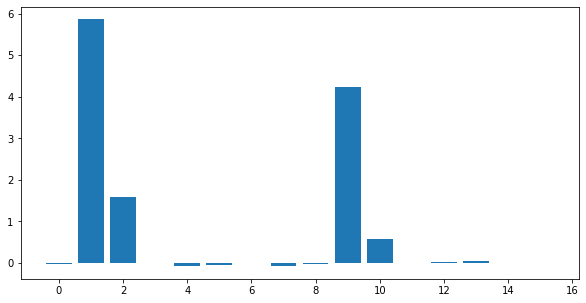

koeficijenti:  [-1.35728114e-02  5.86524348e+00  1.57716612e+00  8.50851504e-03
 -6.21657322e-02 -4.78850815e-02  2.58297276e-03 -8.37543910e-02
 -3.48076287e-02  4.24669481e+00  5.73610493e-01 -6.03896352e-03
  2.95861277e-02  3.64152887e-02  7.23786375e-03  2.79931945e-03]


In [24]:
# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model1.coef_)),regression_model1.coef_)
plt.show()
print("koeficijenti: ", regression_model1.coef_)

#vizuelni prikaz kako su stvarne vrijednosti  raspoređene i one koje du dobijene predviđanjem
x0=range(0,len(y_test1.values))
plt.figure(figsize=(20,10))
plt.scatter(x0,y_test1.values,label="Stvarne vrijednosti")
plt.scatter(x0,y_predicted1,label="Predviđene vrijednosti",alpha=0.5)
plt.legend()

<font color='royalblue'><h3>Duration</h3></font>

In [25]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
regression_model2 = LinearRegression(fit_intercept=True)

# Obuka
regression_model2.fit(X_train_std2, y_train2)

# Testiranje
y_predicted2 = regression_model2.predict(X_test_std2)

In [26]:
# Evaluacija modela
model_evaluation(y_test2, y_predicted2)

Root mean squared error:  3.890771590226368
R2 score:  0.8933858993677786
            y     y_pred
0   18.433333  17.913232
1    9.166667  13.237600
2   19.633333  18.283577
3    9.116667   5.015665
4    8.516667  11.031214
5    6.550000   9.327561
6   10.016667  12.132136
7    5.550000   4.308894
8   19.216667  18.024737
9   20.083333  22.136742
10   5.866667   8.837291
11   3.150000   2.822840
12   5.050000   5.201396
13  10.783333  10.994461
14   3.100000  -1.421530
15   9.216667   9.331482
16   8.200000   8.972676
17   4.633333   7.172787
18   5.483333   3.064303
19  15.600000  16.890223


<font color='blueviolet'><h2>Random Forest</h2></font>

In [27]:
X_train_std1.values[0:100000]

array([[-0.50848767, -0.43614952, -0.14405367, ..., -0.9704563 ,
         1.69707765, -1.11050205],
       [ 0.25726575, -0.32440732, -0.14405367, ..., -0.44242236,
        -0.17343593, -0.12085897],
       [ 1.02301917, -0.5372496 , -0.14405367, ...,  0.78965683,
         0.76182086, -0.78062102],
       ...,
       [-0.50848767,  0.66530925, -0.14405367, ..., -0.9704563 ,
        -0.64106432,  0.53890309],
       [-0.50848767,  0.03476401, -0.14405367, ...,  0.4376342 ,
         1.69707765, -0.78062102],
       [ 2.55452601, -0.62770756, -0.14405367, ...,  1.31769077,
        -0.17343593, -1.77026411]])

In [28]:
rf1 = RandomForestRegressor()

rf1.fit(X_train_std1.values[0:1000000], y_train1[0:1000000])

y_predicted1=rf1.predict(X_test_std1.values[0:1000000])

model_evaluation(y_test1[0:1000000], y_predicted1)

C:\Users\SRDJAN~1\AppData\Local\Temp/ipykernel_11284/3277962830.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rf1.fit(X_train_std1.values[0:1000000], y_train1[0:1000000])


Root mean squared error:  1.095017420031997
R2 score:  0.990062831316867
       y  y_pred
0   15.5  14.845
1    7.0   6.990
2   16.0  16.135
3   11.0  11.275
4    7.5   7.285
5    6.0   6.065
6    7.5   7.720
7    6.5   6.440
8   18.0  18.490
9   26.5  26.090
10   5.5   5.580
11   4.5   4.500
12   6.0   5.840
13   9.5   9.550
14   5.0   5.030
15   8.5   8.550
16   7.5   7.565
17   5.5   5.040
18   6.5   6.715
19  10.0  10.330


C:\Users\SRDJAN~1\AppData\Local\Temp/ipykernel_11284/3277962830.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model_evaluation(y_test1[0:1000000], y_predicted1)


In [28]:
taxi_data=pd.read_parquet('yellow_tripdata_2016-05.parquet',engine='fastparquet')

In [29]:
taxi_data.drop(['airport_fee','congestion_surcharge'],inplace=True,axis=1)

In [30]:
taxi_data.drop(["VendorID",'tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount'],inplace=True,axis=1)

In [31]:
x=taxi_data.drop('fare_amount',axis=1)
y=taxi_data['fare_amount']

In [32]:
x.shape

(11832049, 6)

In [33]:
y.head()

0     2.5
1     2.5
2     5.5
3    11.0
4    15.5
Name: fare_amount, dtype: float64

In [34]:
x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(x, y ,test_size=0.2, random_state =42)

In [35]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
regression = LinearRegression(fit_intercept=True)

# Obuka
regression.fit(x_train3, y_train3)

# Testiranje
y_predicted3 = regression.predict(x_test3)

In [36]:
model_evaluation(y_test3, y_predicted3)

Root mean squared error:  12.15013143606825
R2 score:  0.07180801831764172
       y     y_pred
0    7.0  14.702689
1    8.5  12.123842
2   12.0  13.270480
3    6.5  13.415678
4   52.0  11.939869
5   30.5  15.171020
6   26.5  14.582867
7   31.0  16.028051
8   13.0  12.811903
9   11.5  11.919531
10  13.0  12.621562
11   7.5  13.312559
12  18.5  13.602674
13   9.0  14.799180
14   5.5  13.381007
15  41.5  12.560182
16   6.5  13.756367
17   9.5  11.311471
18   6.5  10.394595
19  12.0  16.411328


In [37]:
#standardizacija za predikciju fare_amount
scaler = StandardScaler()
scaler.fit(x_train3)

x_train_std3 = scaler.transform(x_train3)
x_test_std3 = scaler.transform(x_test3)

x_train_std3 = pd.DataFrame(x_train_std3)
x_test_std3 = pd.DataFrame(x_test_std3)

x_train_std3.columns = list(x.columns)
x_test_std3.columns = list(x.columns)

x_train_std3.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type
0,-0.507851,-0.000685,-0.072612,-1.221042,-1.749548,-0.70742
1,-0.507851,-0.000863,-0.072612,-0.714342,1.004536,-0.70742
2,-0.507851,-0.000577,-0.072612,1.074012,-0.238332,-0.70742
3,-0.507851,-0.000824,-0.072612,-1.295557,1.089278,-0.70742
4,-0.507851,-0.000624,-0.072612,1.148527,1.216389,-0.70742


In [38]:
rf2 = RandomForestRegressor()

rf2.fit(x_train_std3.values[0:100000], y_train3[0:100000])

y_predicted3=rf2.predict(x_test_std3.values[0:100000])

model_evaluation(y_test3[0:100000], y_predicted3)

C:\Users\SRDJAN~1\AppData\Local\Temp/ipykernel_17304/1694665525.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rf2.fit(x_train_std3.values[0:100000], y_train3[0:100000])


Root mean squared error:  4.1853940013217175
R2 score:  0.8700787492204813
       y     y_pred
0    7.0   8.620000
1    8.5   9.402000
2   12.0  12.393942
3    6.5   7.468488
4   52.0  43.640000
5   30.5  30.855000
6   26.5  32.306667
7   31.0  29.985000
8   13.0   9.795000
9   11.5   9.600389
10  13.0  13.854000
11   7.5   6.907917
12  18.5  18.905000
13   9.0   8.820000
14   5.5   6.083821
15  41.5  43.845000
16   6.5   5.867179
17   9.5  10.055000
18   6.5   6.496167
19  12.0  12.795000


C:\Users\SRDJAN~1\AppData\Local\Temp/ipykernel_17304/1694665525.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model_evaluation(y_test3[0:100000], y_predicted3)


Not default random forest

In [39]:
rf2 = RandomForestRegressor(n_estimators=10,max_depth=5)

rf2.fit(x_train_std3.values[0:100000], y_train3[0:100000])

y_predicted3=rf2.predict(x_test_std3.values[0:100000])

model_evaluation(y_test3[0:100000], y_predicted3)

C:\Users\SRDJAN~1\AppData\Local\Temp/ipykernel_17304/966321110.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rf2.fit(x_train_std3.values[0:100000], y_train3[0:100000])


Root mean squared error:  4.2879180776968235
R2 score:  0.8636357724504304
       y     y_pred
0    7.0   8.322852
1    8.5  11.254756
2   12.0   9.731488
3    6.5   7.135463
4   52.0  52.504382
5   30.5  32.795062
6   26.5  30.450981
7   31.0  31.022552
8   13.0   7.135463
9   11.5   9.118534
10  13.0   9.118534
11   7.5   8.134346
12  18.5  19.590823
13   9.0  11.021677
14   5.5   5.086905
15  41.5  45.026031
16   6.5   6.084653
17   9.5   9.118534
18   6.5   7.527204
19  12.0  13.333873


C:\Users\SRDJAN~1\AppData\Local\Temp/ipykernel_17304/966321110.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model_evaluation(y_test3[0:100000], y_predicted3)


In [63]:
y_predicted3=rf2.predict(x_test_std3.values[100000:200000])

model_evaluation(y_test3[100000:200000], y_predicted3)

Root mean squared error:  3.8341988562638893
R2 score:  0.8892420061310611
       y     y_pred
0    6.0   9.118534
1   14.0  12.621694
2    4.0   5.086905
3   16.5  16.687245
4    5.0   5.086905
5   16.0  13.333873
6    7.5   5.086905
7    8.5   9.951830
8   12.0  13.587241
9    7.0   7.135463
10  15.0  15.102241
11  20.0  16.125317
12   6.5   7.135463
13  12.5  13.587241
14  30.0  56.732014
15  13.5  13.587241
16   7.5   9.118534
17   8.5   7.135463
18   6.0   7.135463
19   4.0   5.086905


C:\Users\SRDJAN~1\AppData\Local\Temp/ipykernel_17304/170896808.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model_evaluation(y_test3[100000:200000], y_predicted3)


In [64]:
round(x_train_std3['RatecodeID'],2).unique()

array([-7.0000e-02,  1.5400e+00,  6.3900e+00,  4.7700e+00,  3.1600e+00,
        1.5818e+02,  8.0000e+00])

In [57]:
x_test_std3.loc[round(x_train_std3['RatecodeID'],2)==1.54].count()

passenger_count    55430
trip_distance      55430
RatecodeID         55430
PULocationID       55430
DOLocationID       55430
payment_type       55430
dtype: int64

In [44]:
y_test3.loc[y_test3==52]

11071817    52.0
2147191     52.0
10837979    52.0
5368057     52.0
7726132     52.0
            ... 
5216176     52.0
10707754    52.0
11681828    52.0
2168776     52.0
2942956     52.0
Name: fare_amount, Length: 55626, dtype: float64